In [1]:
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets

To print nicely:

In [2]:
sm.init_printing(use_unicode=True)

# The basic Solow model

The basic Solow model is as follows:

\begin{equation}
Y_t = BK_t^{\alpha}L_t^{1-\alpha} \tag{1}
\end{equation}
\begin{equation}
r_t = \alpha B \left(\frac{K_t}{L_t}\right)^{\alpha-1} \tag{2}
\end{equation}
\begin{equation}
w_t = (1-\alpha) B \left(\frac{K_t}{L_t}\right)^{\alpha-1} \tag{3}
\end{equation}
\begin{equation}
S_t = sY_t \tag{4}
\end{equation}
\begin{equation}
K_{t+1} - K_t = S_t -\delta K_t \tag{5}
\end{equation}
\begin{equation}
L_{t+1} = (1-n)L_t \tag{6}
\end{equation}

We also define the following equations:
\begin{equation}
y_t = \frac{Y_t}{L_t} = Bk_t^{\alpha}
\end{equation}
\begin{equation}
k_t = \frac{K_t}{L_t}
\end{equation}
The meaning of all the letters can be seen below.

## Defining symbols

First we define the necessary variables so we can use sympy:

In [3]:
Y = sm.symbols("Y_t")         #BNP in the economy
y = sm.symbols("y_t")         #BNP per worker
K = sm.symbols("K_t")         #Capital in the economy
k = sm.symbols("k_t")         #Capital per worker
r = sm.symbols("r_t")         #Real rental rate
w = sm.symbols("w_t")         #Real wage
s = sm.symbols("s")           #Rate of savings
n = sm.symbols("n")           #Population growth
g = sm.symbols("g")           #Growth in technology
B = sm.symbols("B")           #Total factor productivity
L = sm.symbols("L_t")         #Labour
alpha = sm.symbols("alpha")   #Return on capital
delta = sm.symbols("delta")   #Depreciation rate on capital
kstar = sm.symbols("k_t^*")   #Steady state for capital
ystar = sm.symbols("y^*")     #Steady state for BNP per worker

It is easy to verify equation (2) and (3) by differentiating equation (1) with respect to respectively $K_t$ and $L_t$:

$r_t$:

In [4]:
sm.simplify(sm.diff(B*K**alpha*L**(1-alpha), K))

$w_t$:

In [5]:
sm.simplify(sm.diff(B*K**alpha*L**(1-alpha), L))

## Solving for steady state

We find the steady state by solving the equation $k_{t+1}-k_t = \frac{1}{1+n} (sBk_t^{\alpha} -(n+\delta)k_t)$ for the constant solution where $k_{t+1} = k_t = k^*$. This gives us the equation $sBk^{\alpha} - (n-\delta)k = 0$ to solve.

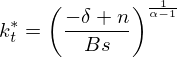

In [6]:
ksteady = sm.solve(s*B*k**alpha-(n-delta)*k, k)[0]
sm.Eq(kstar , ksteady)

This helps us solving for $y^*$:

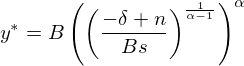

In [7]:
eq1 = sm.simplify(B*ksteady**alpha)
sm.Eq(ystar, eq1)

## Simulating the basic Solow model

In [8]:
def simulate_basic(k,alpha,delta,s,n,B,T):
    """
    Args:
    k      (int)  : initial value for physical capital per worker
    alpha  (float): return on physical capital
    delta  (float): depreciation rate on capital
    s      (float): savings/investments
    n      (float): increase in labour
    B      (int)  : totalfactorproductivity
    T      (int)  : periods to simulate through
    
    Returns:
    A plot showing how capital per worker accumulates over time"""
    
    #First we make a list for our future values to be in
    k_path = [k]
    
    #Then we make which will contain the values for the 45-degree-line
    Degreeline = [0]
    
    #We generate the 45-degree-line for the basic Solow model
    for t in range(1,T):
        line = (n + delta)*t
        Degreeline.append(line)
        
    #We generate the Solow movement
    for t in range(1,T):
        k_plus = s*B*t**alpha
        k_path.append(k_plus)
    
    #Plotting the stuff
    plt.figure(figsize=(5,5))
    plt.plot(k_path[:T], label='$sBk_t^{\u03B1}$', color = 'blue')
    plt.plot(Degreeline[:T], label = '$(n+\delta)k_t$', color = 'black')
    plt.xlim(0,T)
    plt.ylim(0,Degreeline[-1])
    plt.xlabel('$k_t$')
    plt.grid(True)
    plt.legend()
    
    return plt.show()

Example on a simulation with reasonable values:

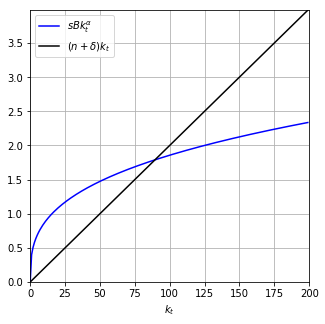

In [9]:
simulate_basic(0,1/3,0.01,0.4,0.01,1,200)

Below, you can try changing the parametres yourself to see how they influence the steady state.

In [10]:
widgets.interact(simulate_basic, 
                k     = widgets.fixed(0), 
                alpha = widgets.FloatSlider(description = '$\u03B1$' , min = 0 ,    max = 0.9 , step = 0.05 , value = 0.3),
                delta = widgets.FloatSlider(description = '$\u03B4$' , min = 0 ,    max = 0.1 , step = 0.01 , value = 0.01),
                s     = widgets.FloatSlider(description = 's' ,        min = 0.01 , max = 0.8 , step = 0.05 , value = 0.4),
                n     = widgets.FloatSlider(description ='$n$',        min = 0.01 , max = 0.1 , step = 0.005, value = 0.01),
                B     = widgets.fixed(1),
                T     = widgets.IntSlider(description='$T$' ,          min = 1,     max = 1000, step = 10,    value = 100))

interactive(children=(FloatSlider(value=0.3, description='$α$', max=0.9, step=0.05), FloatSlider(value=0.01, d…

<function __main__.simulate_basic(k, alpha, delta, s, n, B, T)>

# Extension: The solow model with human capital

The Solow model with human capital is as follows:

\begin{equation}
Y_t = K_t^{\alpha}H_t^{\varphi}(A_tL_t)^{1-\alpha -\varphi} \tag{1} \\
\end{equation}
\begin{equation}
r_t = \alpha \left(\frac{K_t}{A_t L_t}\right)^{\alpha -1} \left(\frac{H_t}{A_t L_t}\right)^{\varphi} \tag{2}
\end{equation}
\begin{equation}
w_t = (1-\alpha) \left(\frac{K_t}{A_tL_t}\right)^{\alpha} \left(\frac{H_t}{A_tL_t}\right)^{\varphi}A_t \tag{3}
\end{equation}
\begin{equation}
K_{t+1}-K_t = s_K Y_t - \delta K_t \quad , \quad K_0 \text{ given} \tag{4}
\end{equation}
\begin{equation}
H_{t+1}-H_t = s_H Y_t -\delta H_t \quad , \quad H_0 \text{ given} \tag{5}
\end{equation}
\begin{equation}
L_{t+1} = (1+n)L_t \quad , \quad L_0 \text{ given} \tag{6}
\end{equation}
\begin{equation}
A_{t+1} = (1+g)A_t \quad , \quad A_0 \text{ given} \tag{7}
\end{equation}

We also define the following equations:
\begin{equation}
\text{Physical capital per effective worker}: \quad \tilde{k_t} = \frac{K_t}{A_tL_t}
\end{equation}
\begin{equation}
\text{Human capital per effective worker}: \quad \tilde{h_t} = \frac{H_t}{A_tL_t}
\end{equation}
\begin{equation}
\text{Output per effective worker}: \quad \tilde{y_t} = \frac{Y_t}{A_tL_t}
\end{equation}
\begin{equation}
\tilde{y_t} = \tilde{k_t}^{\alpha} \tilde{h_t}^{\varphi}
\end{equation}

## Defining symbols

Defining all the new things as symbols so we can use sympy:

In [11]:
A = sm.symbols("A_t")                 #Technology level
H = sm.symbols("H_t")                 #Human capital
h = sm.symbols("h_t")                 #Human capital per effective worker
sK = sm.symbols("s_K")                #Savings in physical capital
sH = sm.symbols("s_H")                #Savings in human capital
phi = sm.symbols("varphi")            #Return on human capital
ktilde = sm.symbols("ktilde_t")       #Physical capital per effective worker
htilde = sm.symbols("htilde_t")       #Human capital per effective worker
ytilde = sm.symbols("ytilde_t")       #BNP per effective worker
htilde1 = sm.symbols("htilde_t+1")    #Human capital per effective worker in period t+1
ktilde1 = sm.symbols("ktilde_t+1")    #Physical capital per effective worker in period t+1
ktildestar = sm.symbols("ktilde^*")   #Steady state for physical capital per effective worker
htildestar = sm.symbols("htilde^*")   #Steady state for human capital per effective worker
ytildestar = sm.symbols("ytilde^*")   #Steady state for BNP per effective worker

We can find the real rental rate and wage just as in the basic Solow model:

$r_t$:

In [12]:
sm.simplify(sm.diff(K**alpha*H**phi*(A*L)**(1-alpha-phi), K))

$w_t$ (we use that $H_t = h_tL_t$):

In [13]:
sm.simplify(sm.diff(K**alpha*h**phi*L**(1-alpha)*A**(1-alpha-phi), L))

## Solving for steady state

We will now find the steady state values for variables $\tilde{k^*}, \tilde{h^*}$ and $\tilde{y^*}$ by solving the following equations:

\begin{equation}
\tilde{k}_{t+1} - \tilde{k}_t = \frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^{\alpha} \tilde{h}_t^{\varphi} - (n+g+\delta +ng)\tilde{k}_t)
\end{equation}
\begin{equation}
\tilde{h}_{t+1} - \tilde{h}_t = \frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^{\alpha} \tilde{h}_t^{\varphi} - (n+g+\delta +ng)\tilde{h}_t)
\end{equation}

First we make variables which transform $\tilde{h}_t$ into a function og $\tilde{k}_t$ and vice verca:

In [14]:
ktildealpha = ktilde**alpha
htildephi = htilde**phi
htok = (sH/sK)*ktilde                 #Turning h into a function of k
htokphi = ((sH/sK)*ktilde)**phi
ktoh = (sK/sH)*htilde                 #Turning k into a function of h
ktohalpha = ((sK/sH)*htilde)**alpha

We set up the equation to solve for $\tilde{h}_{t+1} = \tilde{h}_t = \tilde{h}^*$:

In [15]:
eq = sm.Eq(sH*ktildealpha*htildephi - (n+g+delta+n*g)*htilde)
eq

Then we solve it for $\tilde{h}_t$:

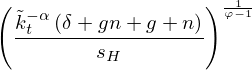

In [16]:
hisolated = sm.solve(eq,htilde)[0]
hisolated

Now we insert the transformed $\tilde{h}_t$:

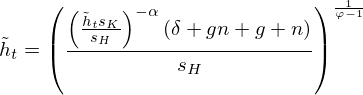

In [17]:
htildefinal = sm.Eq(htilde , ((ktoh**(-alpha)*(delta+n*g+g+n)/sH)**(1/(phi-1))))
htildefinal

And solve for the steady state:

We find that the steady state value for htilde is:


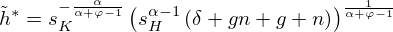

In [18]:
htildesteady = sm.solve(htildefinal,htilde)[0]
print('We find that the steady state value for htilde is:')
sm.Eq(htildestar, htildesteady)

We now do the same for $\tilde{k}_t$:

In [19]:
eq2 = sm.Eq(sK*ktildealpha*htildephi - (n+g+delta+n*g)*ktilde)
eq2

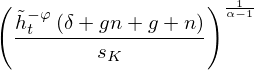

In [20]:
kisolated = sm.solve(eq2,ktilde)[0]
kisolated

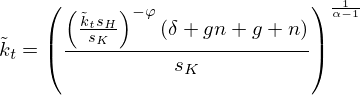

In [21]:
ktildefinal = sm.Eq(ktilde, ((htok**(-phi)*(delta+n*g+g+n)/sK)**(1/(alpha-1))))
ktildefinal

We find that the steady state value for ktilde is:


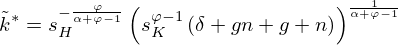

In [22]:
ktildesteady = sm.solve(ktildefinal,ktilde)[0]
print('We find that the steady state value for ktilde is:')
sm.Eq(ktildestar, ktildesteady)

Now we can plot this into $\tilde{y}^*$:

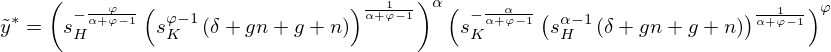

In [23]:
yfinal = sm.Eq(ytildestar, ktildesteady**alpha * htildesteady**phi)
ytildesteady = sm.solve(yfinal, ytildestar)[0]
sm.Eq(ytildestar, sm.solve(yfinal, ytildestar)[0])

We now get that the BNP per capita in steady state must be:

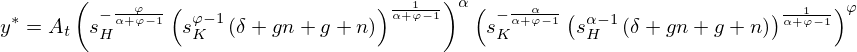

In [24]:
sm.Eq(ystar, A*ytildesteady)

We can now create a function which gives us the steady state values for chosen parameter:

In [25]:
ss_htilde = sm.lambdify((sK, sH, n, g, delta, alpha, phi), htildesteady)
ss_ktilde = sm.lambdify((sK, sH, n, g, delta, alpha, phi), ktildesteady)
ss_ytilde = sm.lambdify((sK, sH, n, g, delta, alpha, phi), ytildesteady)
def steady_states(sK, sH, n, g, delta, alpha, phi):
    
    """
    Args:
    sK    (float): investments in physical income
    sH    (float): investments in human capital
    n     (float): increase in labour
    g     (float): increase in technology
    delta (float): the depreciation rate
    alpha (float): return on physical capital
    phi   (float): return on human capital
    
    Returns:
    Steady state values for h, k and y"""
    
    return print(f'Steady state for h is {ss_htilde(sK, sH, n, g, delta, alpha, phi):0.2f}'), print(f'Steady state for k is {ss_ktilde(sK, sH, n, g, delta, alpha, phi):0.2f}'), print(f'Steady state for BNP per worker is {ss_ytilde(sK, sH, n, g, delta, alpha, phi):0.2f}')

An example on finding steady states could be:

In [26]:
steady_states(0.2,0.2,0.01,0.02,0.01,1/3,1/3)

Steady state for h is 123.14
Steady state for k is 123.14
Steady state for BNP per worker is 24.75


(None, None, None)

## Simulating the Solow model with human capital

We will now simulate the Solow model with human capital, to graphically show how to find the steady state.

In [27]:
def simulate_human_capital(htilde,ktilde,alpha,phi,delta,sK,sH,n,g,T):
    """
    Args:
    htilde (int)  : initial value for human capital per effective worker, normally = 0
    ktilde (int)  : initial value for physical capital per effective worker, normally = 0
    alpha  (float): return on physical capital
    phi    (float): return on human capital
    delta  (float): depreciation rate
    sK     (float): investments in physical income
    sH     (float): investments in human capital
    n      (float): increase in labour
    g      (float): increase in technology
    T      (int)  : periods to simulate through
    
    Returns:
    A plot showing how the capital accumulates over time, as well as steady state values
    """
    #Making a list for all our future values
    htilde_path = [htilde]
    ktilde_path = [ktilde]
    
    #Adding numbers to the list using equation (5) where htilde is isolated
    for t in range(1,T):
        ktilde = t
        htilde_next = ((ktilde**(-alpha)*(delta+n*g+n+g))/sH)**(1/(phi-1))
        htilde_path.append(htilde_next)
    
    #Adding numbers to the list using equation (4) where htilde is isolated
    for t in range(1,T):
        ktilde = t
        ktilde_next = ((ktilde**(-alpha+1)*(delta+n*g+n+g))/sK)**(1/(phi))
        ktilde_path.append(ktilde_next)
    
    #Plotting it all
    plt.figure(figsize=(5,5))
    plt.plot(htilde_path[:T], linewidth = 2, label='$\Delta \~{h} = 0$', color = 'navy')
    plt.plot(ktilde_path[:T], linewidth = 2, label='$\Delta \~{k} = 0$', color = 'lime')
    plt.xlim(0,T)
    plt.ylim(0,T)
    plt.xlabel('$\~{k}$')
    plt.ylabel('$\~{h}$')
    plt.grid(True)
    plt.legend()
    
    return plt.show(), print(steady_states(sK, sH, n, g, delta, alpha, phi))

Example on a simulation with reasonable values:

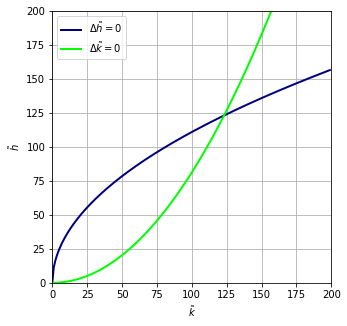

Steady state for h is 123.14
Steady state for k is 123.14
Steady state for BNP per worker is 24.75
(None, None, None)


(None, None)

In [28]:
simulate_human_capital(0,0,1/3,1/3,0.01,0.2,0.2,0.01,0.02,200)

Try changing the parametres yourself to see how they influence the steady state.

In [29]:
widgets.interact(simulate_human_capital, 
                 htilde = widgets.fixed(0), 
                 ktilde = widgets.fixed(0), 
                 alpha  = widgets.FloatSlider(description='$\u03B1$', min=0,    max=0.5,  step=0.005,  value=0.3),
                 phi    = widgets.FloatSlider(description='$\u03C6$', min=0,    max=0.5,  step=0.005,  value=0.3), 
                 delta  = widgets.FloatSlider(description='$\u03B4$', min=0.01, max=0.1,  step=0.001,  value=0.01), 
                 sK     = widgets.FloatSlider(description='$s_K$',    min=0.1,  max=0.4,  step=0.01,   value=0.2), 
                 sH     = widgets.FloatSlider(description='$s_H$',    min=0.1,  max=0.4,  step=0.01,   value=0.2),
                 n      = widgets.FloatSlider(description='$n$',      min=0.01, max=0.1,  step=0.0005, value=0.01), 
                 g      = widgets.FloatSlider(description='$g$',      min=0.01, max=0.1,  step=0.0005, value=0.02), 
                 T      = widgets.IntSlider(description='$T$',        min=1,    max=1000, step=10,     value=100))

interactive(children=(FloatSlider(value=0.3, description='$α$', max=0.5, step=0.005), FloatSlider(value=0.3, d…

<function __main__.simulate_human_capital(htilde, ktilde, alpha, phi, delta, sK, sH, n, g, T)>

# Conclusion

We find that adding human capital as well as technology level has an impact on how we find the real rental rate as well as the real wages. It doesn't change much in how we find the steady state, it just adds some more parameters. The transition-diagram is changing a lot though, we go from having a diagram with $k_t$ on the x-axis and $k_{t+1}$ on the y-axis, to having $\tilde{k}_t$ on the x-axis and $\tilde{h}_t$ on the y-axis. Furthermore the way you graphically find the steady state, changes a lot. In the basic model you just need a 45-degree-line and the capital movement to find the steady state, while you in the human capital model have to find where the two movements cut each other. In our opinion it would be more correct to use the model with human capital to analyze growth in the real world, as it has more parameters that impact how the economy is moving forward.